In [17]:

bag_name_sim = '/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-03_0.bag'

bag_name_sim2 = '/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-56_0.bag'



In [18]:
import rosbag
import rospy


bag_sim = rosbag.Bag(bag_name_sim, 'r')

bag_sim2 = rosbag.Bag(bag_name_sim2, 'r')



topics_sim = bag_sim.get_type_and_topic_info()[1].keys()

topics_sim2 = bag_sim2.get_type_and_topic_info()[1].keys()



# types = []
# for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
#     types.append(bag.get_type_and_topic_info()[1].values()[i][0])

In [19]:
# https://github.com/jmscslgroup/bagpy/blob/master/notebook/bagpy_example.ipynb
import bagpy # easy to use wrapper for rosbag
from bagpy import bagreader

b_sim = bagreader(bag_name_sim)

b_sim2 = bagreader(bag_name_sim2)

[INFO]  Successfully created the data folder /home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-03_0.
[INFO]  Successfully created the data folder /home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-56_0.


In [20]:
JOINT_MSG_PATH_SIM = b_sim.message_by_topic(topic='/digit_state')
JOINT_MSG_PATH_SIM

'/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-03_0/digit_state.csv'

In [21]:
JOINT_MSG_PATH_SIM2 = b_sim2.message_by_topic(topic='/digit_state')
JOINT_MSG_PATH_SIM2

'/home/ashamsah3/catkin_ws/src/digit_main/log_data/_2023-01-23-15-25-56_0/digit_state.csv'

In [22]:
import pandas as pd
import numpy as np

veldf_sim = pd.read_csv(JOINT_MSG_PATH_SIM)
veldf_sim;

veldf_sim2 = pd.read_csv(JOINT_MSG_PATH_SIM2)
veldf_sim2;

In [85]:
# CoM

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle
fig, ax = bagpy.create_fig(1)
from turtle import color


ax[0].plot((veldf_sim['p_WC_0'][12000:19000]), (veldf_sim['v_StB_Wpc_L_0'][12000:19000]),  color='red', label = 'W/O ankle actuation');
ax[0].plot((veldf_sim2['p_WC_0'][12000:19000]), (veldf_sim2['v_StB_LIP_d_0'][12000:19000]),  color='black', label = 'desired phase');
ax[0].plot((veldf_sim2['p_WC_0'][12000:19000]), (veldf_sim2['v_StB_Wpc_L_0'][12000:19000]),  color='blue', label = 'With ankle actuation');


# ax[0].plot((veldf_sim2['robot_time'][12000:19000]), (veldf_sim2['v_StB_LIP_d_0'][12000:19000]),  color='black', label = 'desired phase');
# ax[0].plot((veldf_sim2['robot_time'][12000:19000]), (veldf_sim['v_StB_Wpc_L_0'][12000:19000]),  color='red', label = 'W/O ankle actuation');
# ax[0].plot((veldf_sim2['robot_time'][12000:19000]), (veldf_sim2['v_StB_Wpc_L_0'][12000:19000]),  color='blue', label = 'With ankle actuation');
# ax[0].set_aspect(1)

# # plt.ylabel('m')
# plt.xlabel('Time [s]')
# plt.title('y_COM')
ax[0].grid(True)
# ax[0].set_xticklabels([])
# ax[0].set_yticklabels([])
plt.legend()

NameError: name 'o' is not defined

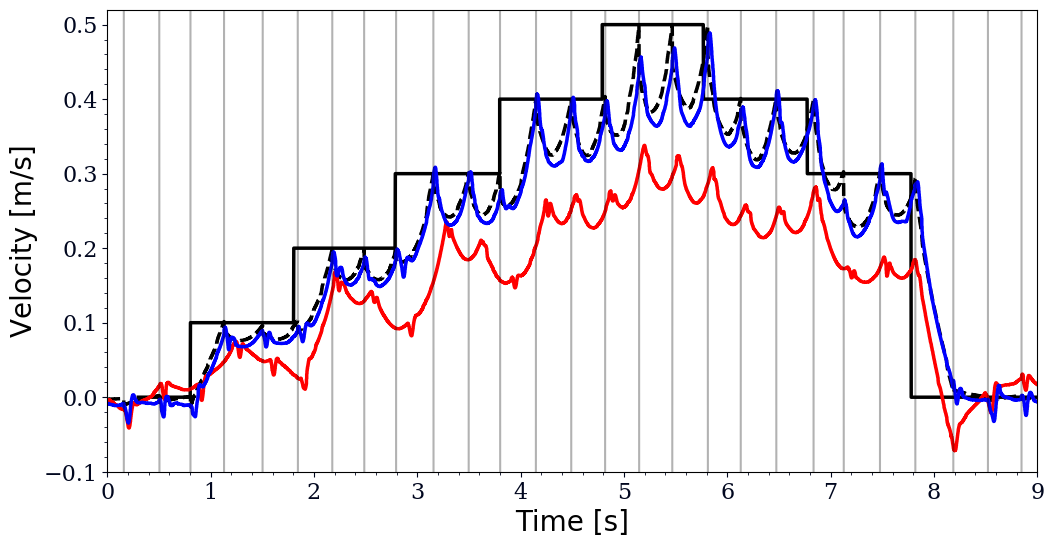

In [125]:
# CoM

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
from turtle import color
csfont = {'fontname':'Times New Roman'}


# ax[0].plot((veldf_sim['p_WC_0'][12000:19000]), (veldf_sim['v_StB_Wpc_L_0'][12000:19000]),  color='red', label = 'W/O ankle actuation');
# ax[0].plot((veldf_sim2['p_WC_0'][12000:19000]), (veldf_sim2['v_StB_LIP_d_0'][12000:19000]),  color='black', label = 'desired phase');
# ax[0].plot((veldf_sim2['p_WC_0'][12000:19000]), (veldf_sim2['v_StB_Wpc_L_0'][12000:19000]),  color='blue', label = 'With ankle actuation');

ax.plot((veldf_sim['robot_time'][10000:20000])-(veldf_sim['robot_time'][10000])+0.3, (veldf_sim['target_vel_0'][10000:20000]), linewidth = 2.5,  color='black', label = 'target velocity');
ax.plot((veldf_sim['robot_time'][10000:20000])-(veldf_sim['robot_time'][10000]), (veldf_sim['v_StB_LIP_d_0'][10000:20000]), linewidth = 2.5, color='black', linestyle = '--', label = 'desired phase');
ax.plot((veldf_sim2['robot_time'][10000:20000])-(veldf_sim2['robot_time'][10000]), (veldf_sim2['v_StB_Wpc_L_0'][10000:20000]), linewidth = 2.5, color='red', label = 'W/O ankle actuation');
ax.plot((veldf_sim['robot_time'][10000:20000])-(veldf_sim['robot_time'][10000]), (veldf_sim['v_StB_Wpc_L_0'][10000:20000]), linewidth = 2.5, color='blue', label = 'With ankle actuation');
ax.plot((veldf_sim['robot_time'][10000:20000])-(veldf_sim['robot_time'][10000]), (veldf_sim['support_leg'][10000:20000]-0.2), color='black', alpha = 0.3);


ax.set_ylim([-0.1, 0.52])
ax.set_xlim([0.0, 9])
# ax[0].set_aspect(8)
# ax[0].grid(False)
plt.ylabel('Velocity [m/s]',**csfont, fontsize=20)
plt.xlabel('Time [s]',**csfont, fontsize=20)

# plt.title('')
# ax[0].grid(True)
# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.legend()
plt.savefig('ankle_actuation.svg')